In [3]:
%pylab nbagg
from tvb.simulator.lab import *
#Phase Plane
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive
from tvb.datatypes.time_series import TimeSeriesRegion
from tvb.datatypes import graph
from tvb.simulator import noise 
import numpy as np
import time as tm

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Connectivity 
conn = connectivity.Connectivity.from_file('../macaque/connectivity_84.zip')
conn.configure()
nregions = len(conn.region_labels)
conn.weights = conn.weights - conn.weights*np.eye(nregions)

conn.speed = numpy.array([np.inf])
conn.configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


<IPython.core.display.Javascript object>


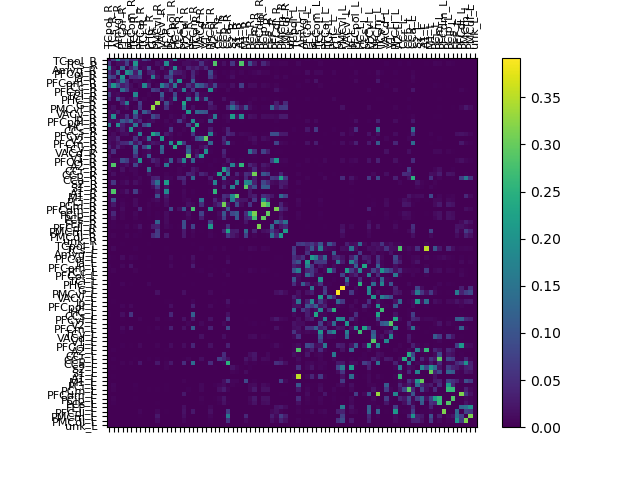

<IPython.core.display.Javascript object>


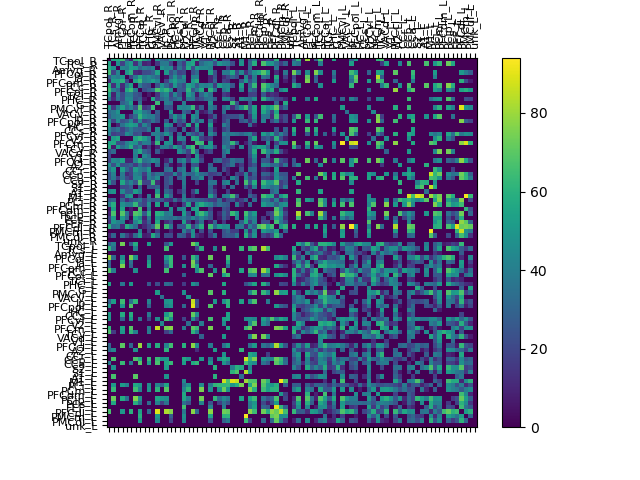

In [13]:
#imshow(conn.weights, interpolation =     'nearest')

plot_connectivity(connectivity = conn)

In [16]:
g2d = models.Generic2dOscillator()
g2d

,value
"I [min, median, max]","[0, 0, 0]"
I dtype,float64
I shape,"(1,)"
Type,Generic2dOscillator
"a [min, median, max]","[-2, -2, -2]"
a dtype,float64
a shape,"(1,)"
"alpha [min, median, max]","[1, 1, 1]"
alpha dtype,float64
alpha shape,"(1,)"


In [17]:
dt = 1
heuinit = integrators.HeunDeterministic(dt=dt)

<IPython.core.display.Javascript object>


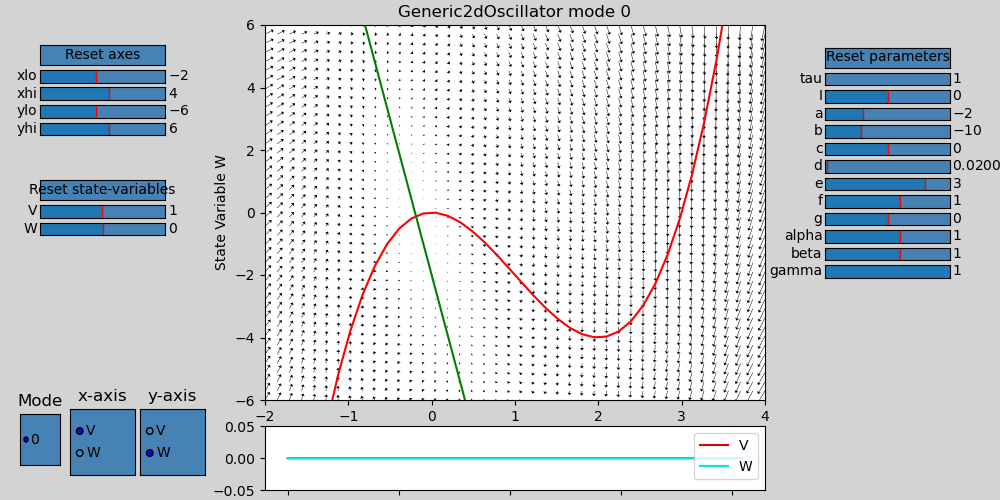

In [18]:
ppi_fig = PhasePlaneInteractive(model=g2d, integrator=heuinit)
ppi_fig.show()

In [58]:
#dt = 1
hiss = noise.Additive(nsig=np.array([0.001]))
heunstochint = integrators.HeunStochastic(dt=1, noise=hiss)



In [56]:
g2d = models.Generic2dOscillator(a=np.array([1.7402]))
g2d

,value
"I [min, median, max]","[0, 0, 0]"
I dtype,float64
I shape,"(1,)"
Type,Generic2dOscillator
"a [min, median, max]","[1.7402, 1.7402, 1.7402]"
a dtype,float64
a shape,"(1,)"
"alpha [min, median, max]","[1, 1, 1]"
alpha dtype,float64
alpha shape,"(1,)"


In [6]:
sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=np.array([1.7402])),
    connectivity=conn,
    coupling=coupling.Difference(a=numpy.array([0.5])),
    integrator=integrators.HeunStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([0.001]))),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        ),
    simulation_length=10000,
).configure()

(tavg_time, tavg_data),  = sim.run()

<IPython.core.display.Javascript object>


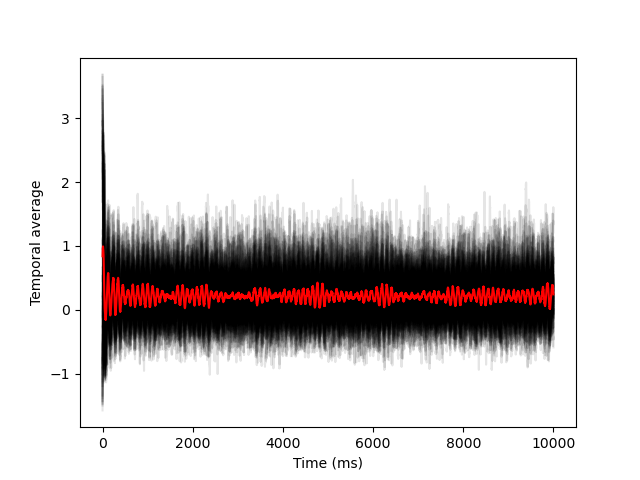

Text(0.5, 0, 'Time (ms)')

In [137]:
figure()
plot(tavg_time, tavg_data[:, 0, :, 0], 'k', alpha=0.1)
plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), 'r', alpha=1)
ylabel("Temporal average")
xlabel('Time (ms)')


In [138]:
import tvb.datatypes.time_series
tsr = tvb.datatypes.time_series.TimeSeriesRegion(
    data=tavg_data,
    connectivity=conn,
    sample_period=sim.monitors[0].period / 1000.0, 
    sample_period_unit="s")
tsr.configure()
tsr

,value
Dimensions,"('Time', 'State Variable', 'Region', 'Mode')"
Length,10.0
Region Mapping,None
Region Mapping Volume,None
Sample period,0.001
Source Connectivity,Connectivity gid: 0e6a0660-960f-413d-8da2-58cd81ee48d1
Time units,s
Time-series name,TimeSeriesRegion gid: e1151a80-c459-482a-8c7e-977dde79add1
Time-series type,TimeSeriesRegion
"[min, median, max]","[-1.57735, 0.189816, 3.68643]"


In [7]:
tavg_data /= (np.max(tavg_data,0) - np.min(tavg_data, 0))
tavg_data -= np.mean(tavg_data)

<IPython.core.display.Javascript object>


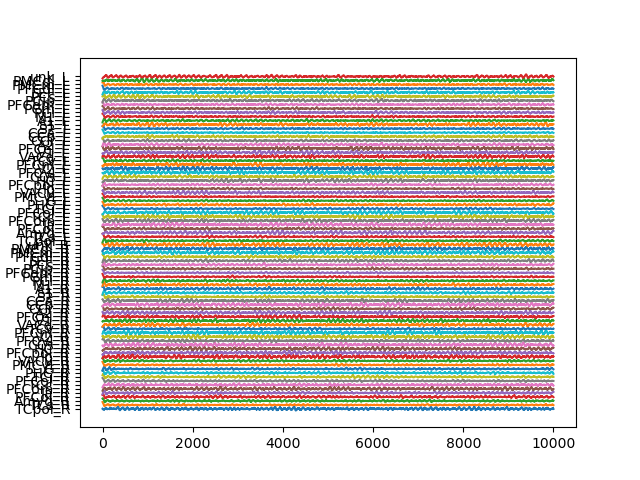

In [8]:
fig2 = figure()
plt.plot(tavg_time[:], tavg_data[:,0,:84,0]+r_[:84])
plt.yticks(range(84), conn.region_labels, fontsize=10)
plt.show()

In [140]:
tavg_data = tavg_data[1000:10000]

tsr = TimeSeriesRegion(connectivity = conn,
                      data = tavg_data,
                       sample_period = sim.monitors[0].period)
tsr.configure()

In [141]:
def ev(tsr):
    input_shape = tsr.data.shape
    result_shape = (input_shape[2], input_shape[2], input_shape[1], input_shape[3])
    result = numpy.zeros(result_shape)

    for mode in range(result_shape[3]):
        for var in range(result_shape[2]):
            data = tsr.data[:,var,:, mode].squeeze()
            result[:, :, var, mode] = numpy.corrcoef(data.T)

    corr_coeff = graph.CorrelationCoefficients(source=tsr, array_data=result)
    return corr_coeff

In [142]:
result = ev(tsr)

FC = result.array_data[..., 0, 0]

print(FC.shape)

(84, 84)


<IPython.core.display.Javascript object>


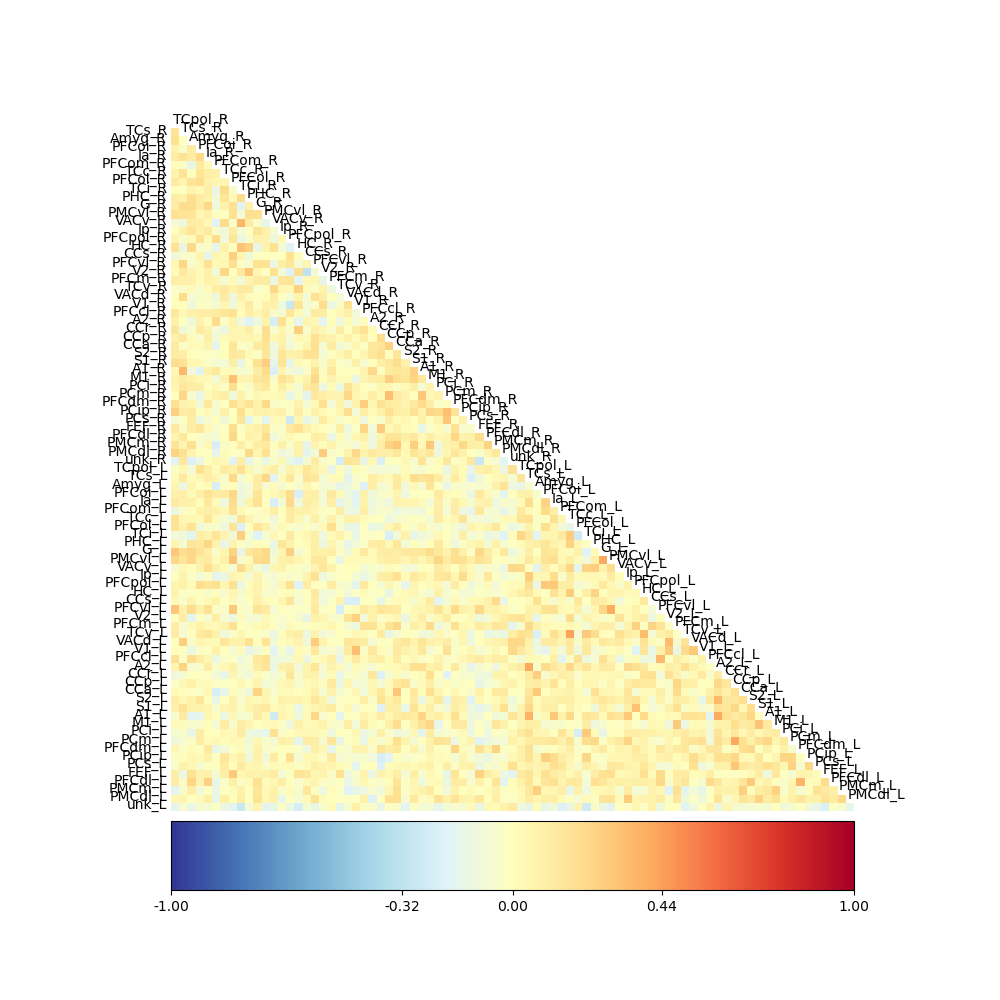

/home/rnwick/miniconda3/envs/tvb/lib/python3.8/site-packages/tvb/simulator/plot/tools.py:472: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, cax=ax_cb, orientation='horizontal',
/home/rnwick/miniconda3/envs/tvb/lib/python3.8/site-packages/tvb/simulator/plot/tools.py:472: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(im, cax=ax_cb, orientation='horizontal',


In [143]:
plot_tri_matrix(FC,
                cmap=pyplot.cm.RdYlBu_r, 
                node_labels= sim.connectivity.region_labels,
                size=[10., 10.],
                color_anchor=(-1.0, 1.0));

<IPython.core.display.Javascript object>


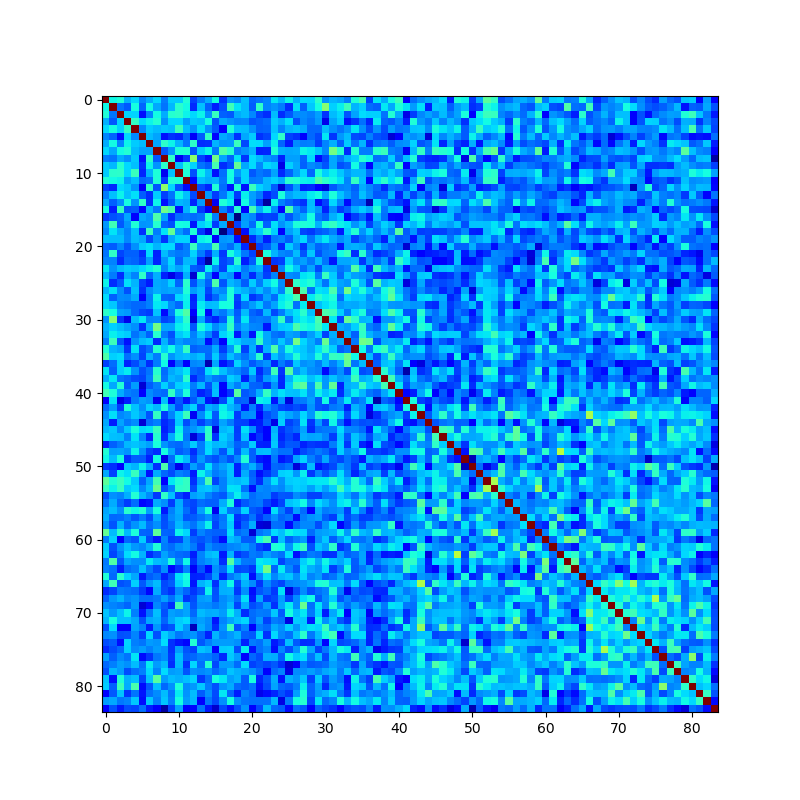

In [144]:
figure(figsize=(8,8))
imshow(FC, interpolation='nearest', cmap = 'jet')
plt.show()